This is a demonstration on the new structure of the bivariate package. It now uses classes, so the way we interact with the package is a bit different. Note: as of this commit, only the files `data_setup.py` and `data_exploration.py` have been incorporated in the class.

The idea is as follows: the user can create a `Dataset` object from a csv file, SURFdrive link, or a Pandas `DataFrame`. The `Datset` class contains the functionality of the original package (which was 'finished' June 2022), but all of the old functions are now methods of the new class. This cleans up the code quite a bit, since we don't have to pass the dataframe and column names to every funtion.

We can import the new class with just one line:

In [1]:
from bivariate.class_dataset import Dataset

In this demonstration, I've used the same file as the one in `Test_Climate.py`. It is a file from the SURFdrive. 

In [2]:
test_folder = "https://surfdrive.surf.nl/files/index.php/s/Wg6SWc38zn8jqVg"
test_path = "subfolder01/subfolder02/Climate_Data_Washington_Metric.csv"

col_time = "DATE_TIME"
col_names = ["POWER", "CLOUD_BROKEN"]
#col_Labels not working yet in plots (see Issue #)
col_labels = ["Power", "Clouds"]
col_labels = [["Power consumption [units]", "Clouds, broken [units]"], ["Power", "Clouds"]]
col_labels = {"long":["Power consumption [units]", "Clouds, broken [units]"], "short":["Power", "Clouds"]}

Regardless of the source file location, the column with the time stamps, `col_time`, must be specified, along with the column header names, `col_names`, representing the (two) variables to be used in the analysis. A string can be specified for the columns to be used in formatted applications (e.g., figure axes, summary tables) using the optional input `col_labels`. We can create a `Dataset` object directly from a SURFdrive link by using either the `from_surfdrive_path` or `from_surfdrive_file` classmethods:

In [3]:
d = Dataset.import_from_surfdrive_path(
        test_folder, test_path, col_time, col_names, col_labels)

In [4]:
d._cols

['POWER', 'CLOUD_BROKEN']

In [5]:
d._col_labels

{'short': ['Power', 'Clouds'],
 'long': ['Power consumption [units]', 'Clouds, broken [units]']}

In [6]:
d.set_TUDstyle()

{'cyan': '#00A6D6',
 'pink': '#EF60A3',
 'green': '#6CC24A',
 'yellow': '#FFB81C',
 'blue': '#0076C2',
 'purple': '#6F1D77',
 'lightcyan': '#00B8C8',
 'orange': '#EC6842',
 'darkgreen': '#009B77',
 'darkred': '#A50034',
 'red': '#E03C31',
 'darkblue': '#0C2340'}

The rest is really easy. For example we can clean the dataset:

In [7]:
d.clean_dataset()

Make a time plot:

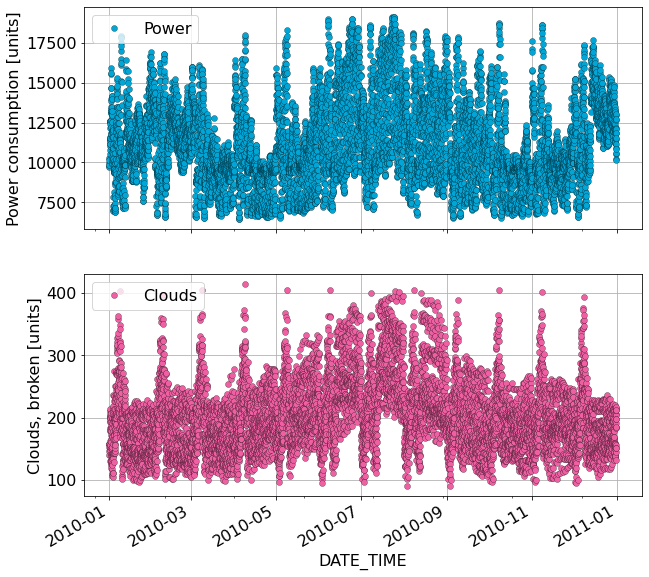

In [8]:
unused = d.time_plot()

Get a summary of the data:

In [9]:
d.data_summary()

,POWER,CLOUD_BROKEN
count,8756.000000,8756.000000
mean,11280.123801,204.415715
std,2624.918714,57.807106
min,6430.000000,90.000000
25%,9417.750000,161.000000
50%,10856.500000,197.000000
75%,13042.000000,237.000000
max,19140.000000,414.000000


Or make a histogram:

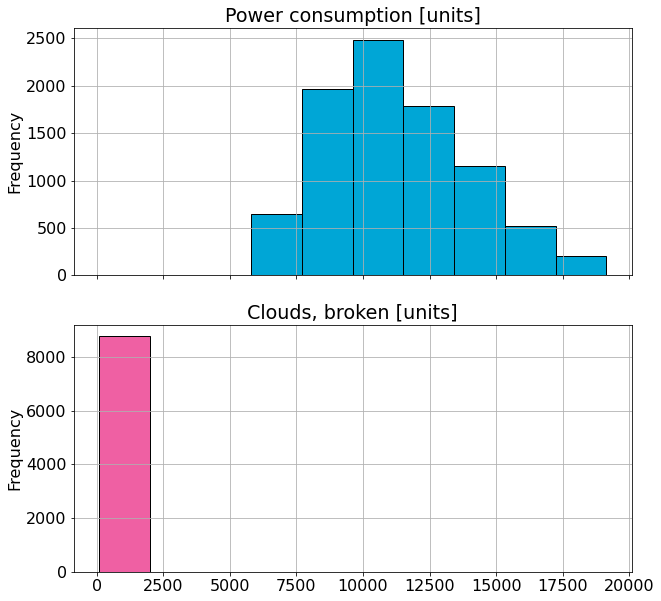

In [10]:
[unused, unused] = d.hist_plot()

(<Figure size 1800x720 with 8 Axes>,
 array([<matplotlib.figure.SubFigure object at 0x000002BB11D15460>,
       dtype=object))

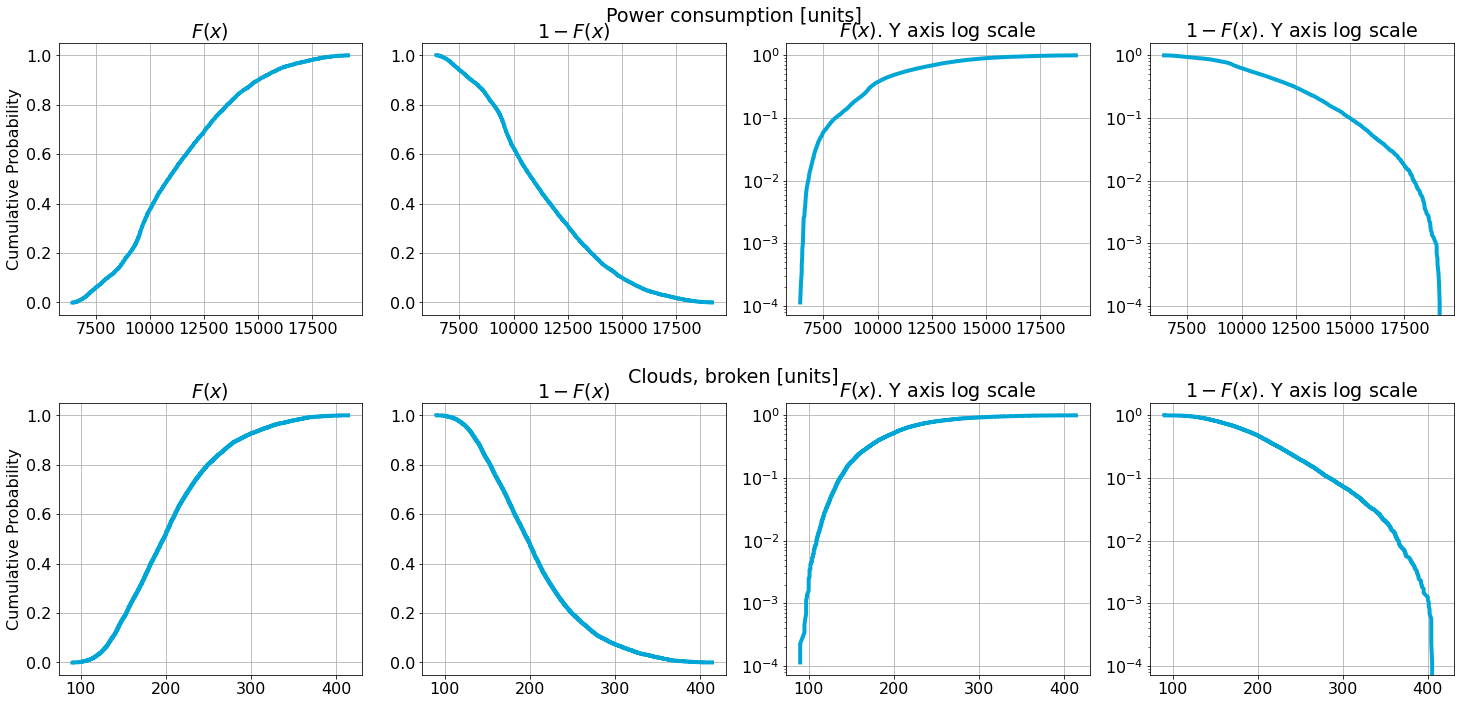

In [11]:
d.plot_ecdf()

In [12]:
#d.fit_ev('POWER')

In [13]:
#d.create_ev(period='W')

In [14]:
#d.fit_ev(var='POWER')

In [15]:
#d.QQ_plot('POWER', 'normal')

In [16]:
#d.bivar_fit(["POWER", "CLOUD_BROKEN"])

In [17]:
d.fit_distribution()

In [18]:
d.results['POWER'].distributions

{'Normal': {'parameters': (11280.123800822294, 2624.7688169381577),
  'aic': 70670.66801607075,
  'bic': 70684.82300498804},
 'Exponential': {'parameters': (6430.0, 4850.123800822294),
  'aic': 72154.26842512557,
  'bic': 72168.42341404286},
 'Lognormal': {'parameters': (0.2708590876735465,
   1575.488282819871,
   9357.90796350907),
  'aic': 70407.0308109184,
  'bic': 70428.26329429433},
 'Logistic': {'parameters': (11118.515924933314, 1517.4188206722781),
  'aic': 70795.47399888566,
  'bic': 70809.62898780295}}

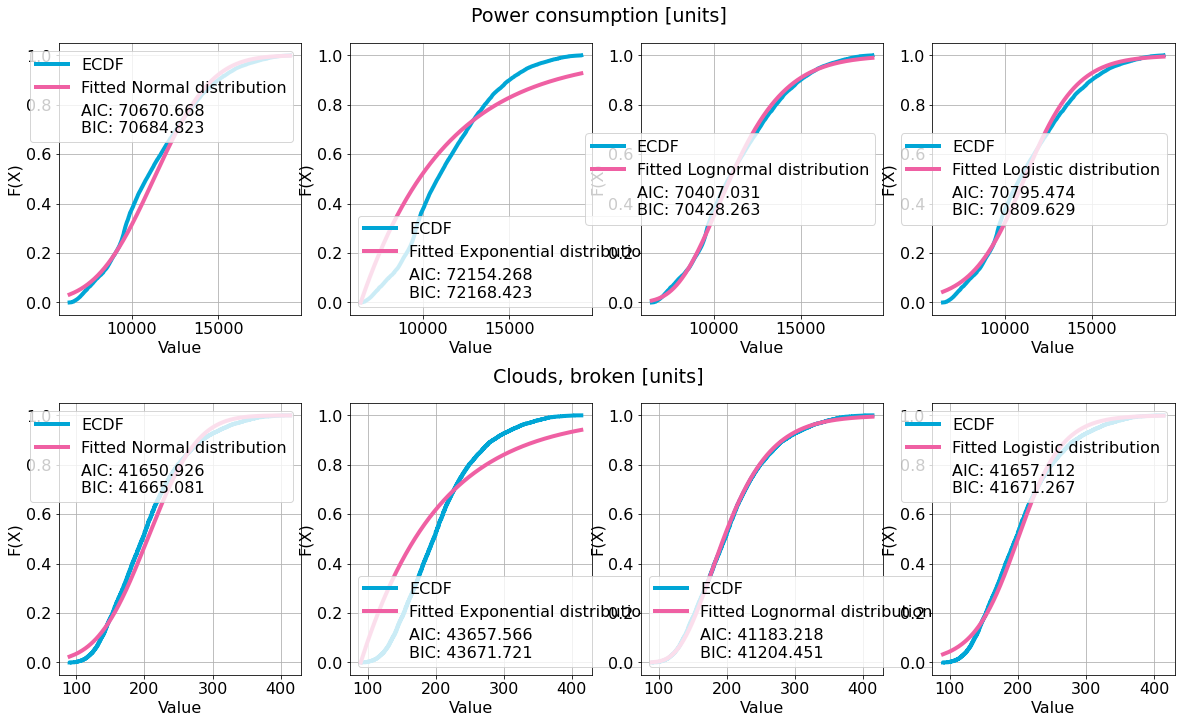

In [19]:
d.plot_fitted_distributions()

In [20]:
d.create_ev('W')

,DATE_TIME,POWER,CLOUD_BROKEN
0,2010-01-03 23:00:00,15955.0,236.0
1,2010-01-10 23:00:00,17940.0,402.0
2,2010-01-17 23:00:00,16417.0,262.0
3,2010-01-24 23:00:00,13655.0,227.0
4,2010-01-31 23:00:00,16908.0,228.0
5,2010-02-07 23:00:00,16239.0,360.0
6,2010-02-14 23:00:00,16808.0,397.0
7,2010-02-21 23:00:00,15256.0,249.0
8,2010-02-28 23:00:00,14728.0,247.0
9,2010-03-07 23:00:00,16086.0,361.0


(<Figure size 720x1440 with 2 Axes>,
 array([<AxesSubplot:xlabel='Power consumption [units]', ylabel='F(X)'>,
        <AxesSubplot:xlabel='Clouds, broken [units]', ylabel='F(X)'>],
       dtype=object))

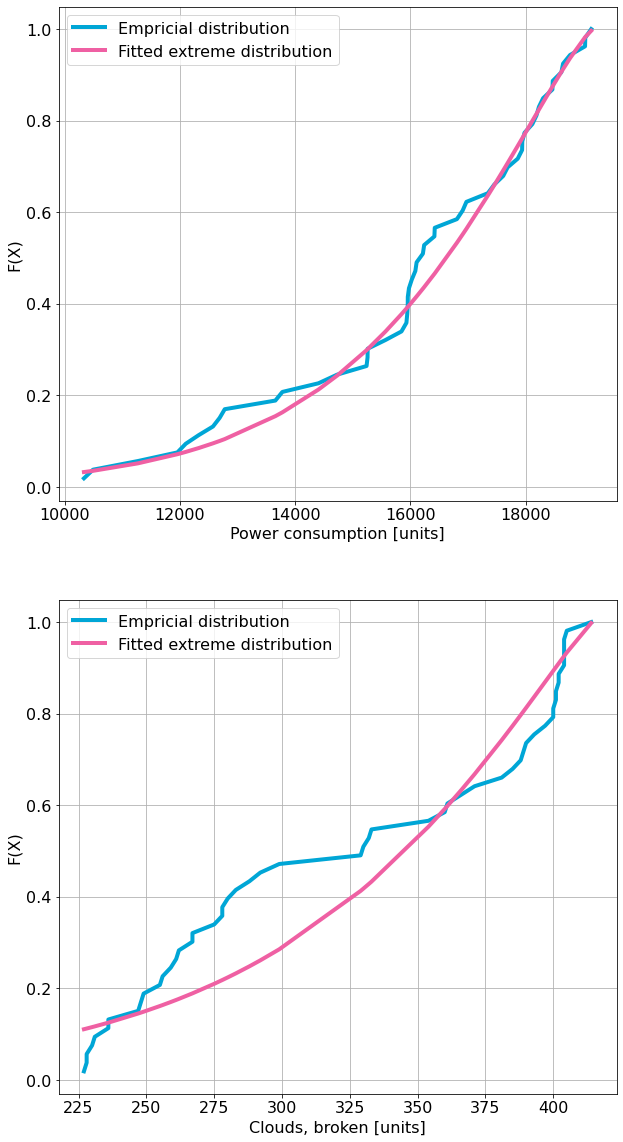

In [21]:
unused = d.fit_ev()
d.plot_ev()

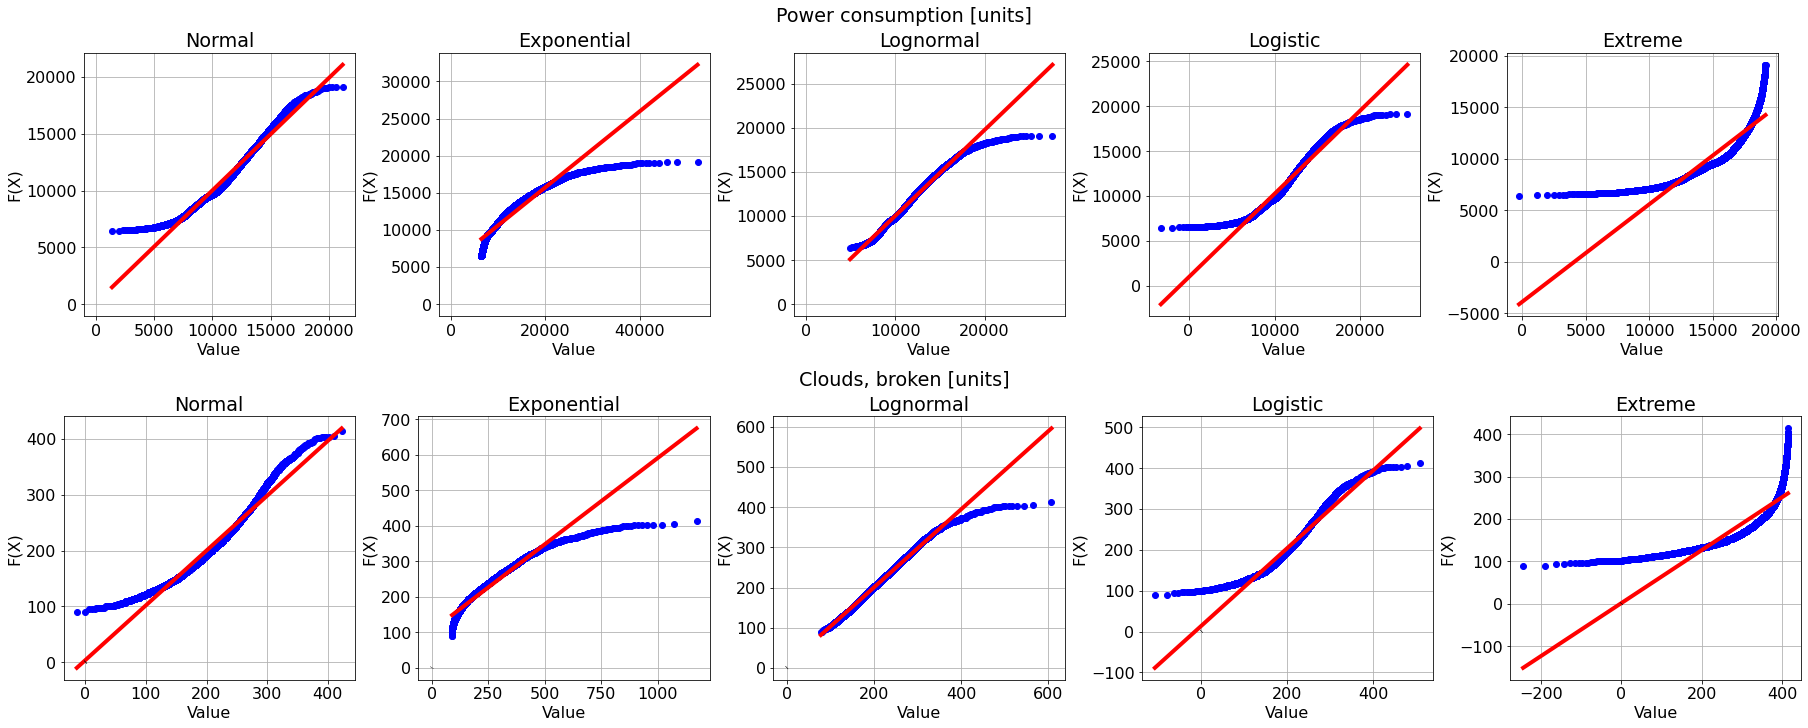

In [22]:
unused = d.QQ_plot()

In [23]:
d.bivar_fit()

,0,1
0,17526.436903,266.954109
1,10565.052495,266.700912
2,13648.916417,150.738642
3,10415.510384,191.806874
4,10806.125401,113.808010
...,...,...
8751,9940.853243,86.616969
8752,8626.280671,188.521929
8753,12036.097463,262.735758
8754,14651.554117,242.159530


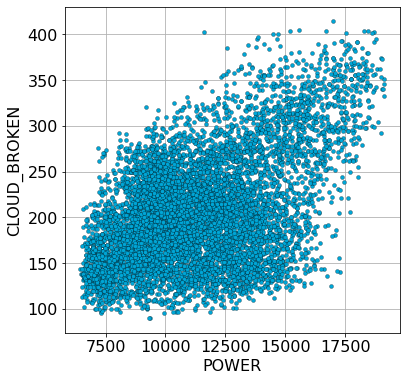

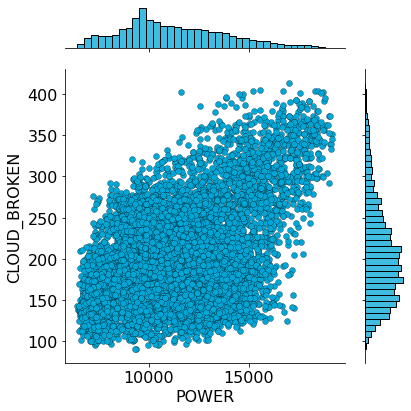

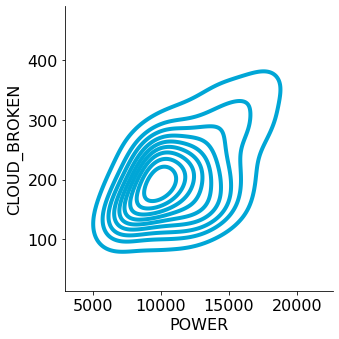

In [24]:
d.bivar_plot()

In [25]:
#p_and, p_or = d.and_or_probabilities(col_names, [0.9, 0.9])
#p_and, p_or = d.plot_and_or_probabilities([0.9, 0.9], plot=True)